### **$$\text{EPS 109 - Final Exam}$$**
###  **$$\text{Thursday, December 15, 2022}$$**

### This exam is **open book, open notes, open internet**. You are permitted to recycle any old code of yours. Using code from the internet is discouraged but if you do so, please insert a citation.  

Please turn your **mobile phone off** and **close any chat and messaging app** on your latop. Please submit your exam in form of a single well-saved Jupyter notebook file.
Good luck!

## Honor code
Please retype the following pledge in the following cell and sign it: "I will not use any unauthorized aid on this exam and will not communicate any topics until 24 hours later."

In [ ]:
# Your pledge and name: ...

In [2]:
#Load these libraries before you proceed.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['figure.figsize'] = (5,5)

|**Part**  |     **Full score**     |  **Your Score**|
|:----------   |:----------------------:|---------------:| 
| (1)          |    48                  |                |
| (2)          |    59                  |                |
| Total        |    107                 |                |

# PART 1: Plotting functions and a bit more<font color="red" size=5> (48 pts) </font>

### (a) In a single digram, plot the three functions $$f_1(x) = 2*sin(4*x)$$
### $$f_2(x) = 2*cos(4*x)$$
### $$f_3(x) = -2*sin(2*x)$$
### over the interval from $-\pi$ to $\pi$ using n=10000 points. Label each curve and give it a different color. Plot function 3 with a line width four times as thick as the others.<font color="red" size="3" > (6 pts) </font>

### (b) In a separate digram, make an X-Y plot of the function $X=f_1(x)$ and $Y=f_2(x)$. Add a grid lines with the command plt.grid()<font color="red" size="3" > (2 pts) </font>

### (c) In a separate digram, make an X-Y plot of the function $X=f_2(x)$ and $Y=f_3(x)$.  Add a grid lines with the command plt.grid() <font color="red" size="3" > (2 pts) </font>

### (d) In a separate digram, make an X-Y plot of the function $X=f_3(x)$ and $Y=f_1(x)$. Add a grid lines with the command plt.grid() <font color="red" size="3" > (2 pts) </font>

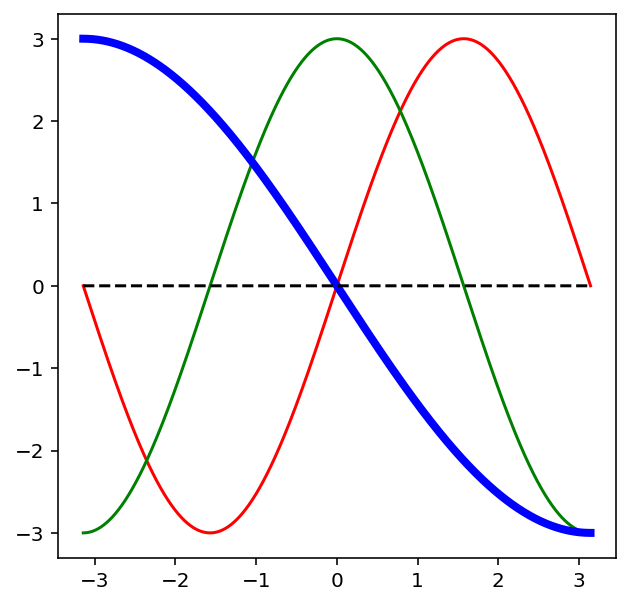

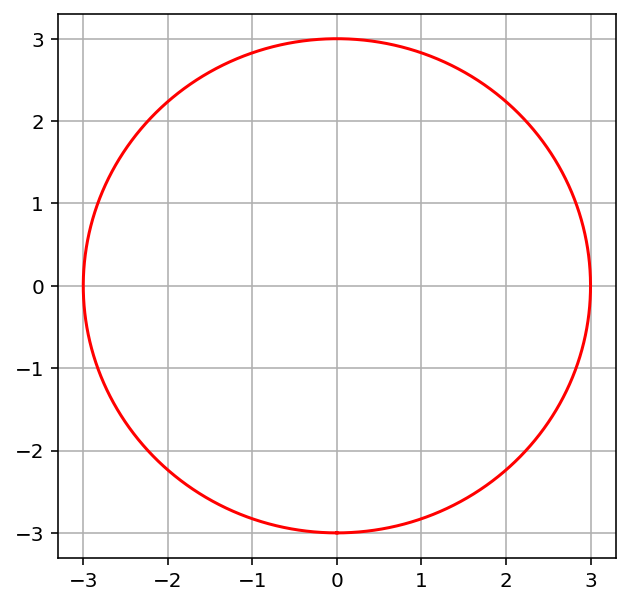

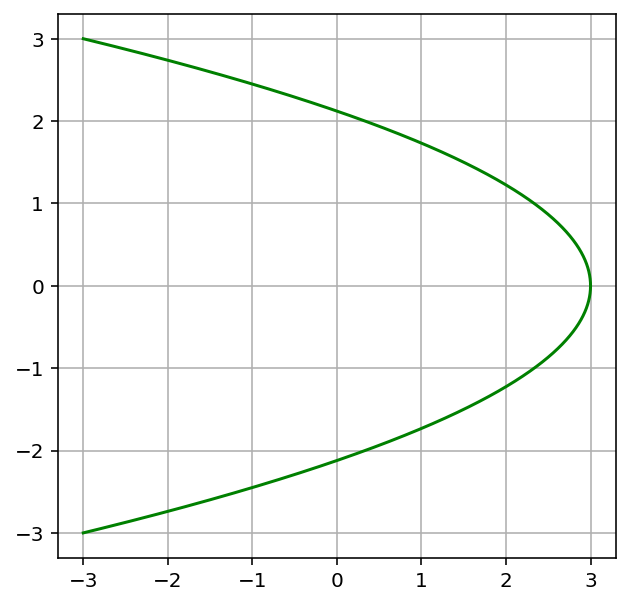

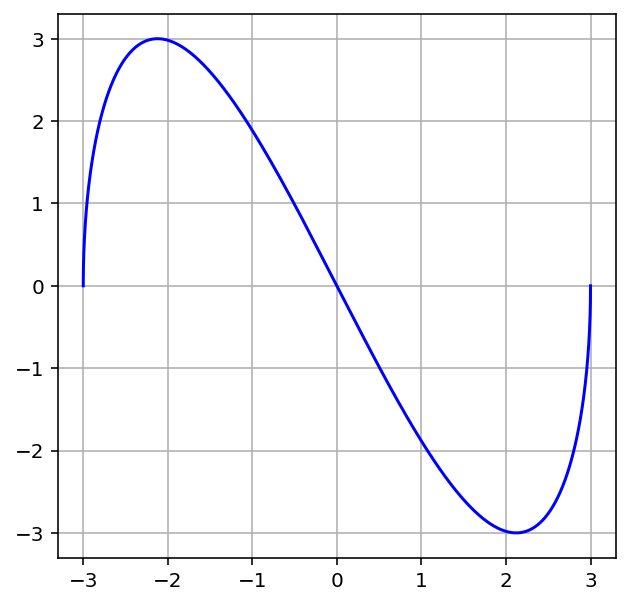

In [9]:
x = np.linspace(-np.pi,np.pi,10000)
#x = np.linspace(-np.pi,-np.pi/2,10000)
#x = np.copy(x[:n-1])
f1 = 3.0*np.sin(x)
f2 = 3.0*np.cos(x)
f3 = -3.0*np.sin(x/2)
plt.plot(x,f1,'r')
plt.plot(x,f2,'g')
plt.plot(x,f3,'b',lw=4)
plt.plot(x,f1*0.0,'k--')
plt.show()
plt.plot(f1,f2,'r')
plt.grid()
plt.show()
plt.plot(f2,f3,'g')
plt.grid()
plt.show()
plt.plot(f3,f1,'b')
#plt.gca().set_aspect('equal')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))
#plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.5))
plt.grid()
plt.show()

### (e) Even though the three curves above looks fairly smooth, they are in fact polygons because they were constructed from 10000 individual points. According to wikipedia, the AREA of a non-overlapping polygon is given by
### $$A = \frac{1}{2}\left| \sum_{i=0}^{n-1} (x_i-x_{i+1})*(y_i+y_{i+1}) \right|$$
### where $n$ is the number of distinct $(x_i,y_i)$ points of the polygon, which we assume to be closed so that $x_0=x_n$ and $y_0=y_n$.
### Write a Python function that computes the polygon area that takes two numpy arrays 'x' and 'y' as arguments. <font color="red" size="3" > (6 pts) </font>

### (f) Using your area function, compute the area of the shape that is spanned by $X=f_1(x)$ and $Y=f_2(x)$ in graph (b) above. Using your knowlegde in geometry, write down the analytic result for this area. Say whether the two values agree and not.<font color="red" size="3" > (6 pts) </font>

### (g) Using your area function, compute the area of the shape that is spanned by $X=f_2(x)$ and $Y=f_3(x)$ in graph (c) above. Say whether your result is correct or not. <font color="red" size="3" > (2 pts) </font>

### (h) Using your area function, compute the area of the shape that is spanned by $X=f_3(x)$ and $Y=f_1(x)$ in graph (d) above. Say whether result that your area function computes is correct or not. <font color="red" size="3" > (4 pts) </font>

### (i) Most likely you determined that the area function did not give the correct results for case (h). Which condition for the area formula was violated? <font color="red" size="3" > (4 pts) </font>

### (j) Come up with a rough estimate for the area that is enclosed by the shape in graph (d). Simply count the number of squares and their fraction. Give a result with accuracy of 20% (Note that your squares may not have the area of 1.) <font color="red" size="3" > (4 pts) </font>

### (k) There is a way to compute the area of shape in graph (d) with your area function by avoiding the problem that you stated in (i). Look at shape of function $f_3$ in graph (a) and related it to graph (d). Now try to compute the area correctly and compare your result to your estimate in (j). <font color="red" size="3" > (10 pts) </font>

In [11]:
def area(x,y):
    n = x.shape[0]
    a = 0.0
    for i in range(n):
        j = (i+1)%n
        a += 0.5*(y[i]+y[j])*(x[i]-x[j])
    return np.abs(a)

n = f3.shape[0]
print(area(f1,f2)/np.pi,3.0**2)
print(area(f2,f3))
print(area(f3,f1))
print(2*area(f3[:n//4],f1[:n//4]))

8.999999407705262 9.0
23.999999605137017
4.407267639965438e-15
1.6051022851247647


# PART 2: Earthquakes and more <font color="red" size=5>(59 pts) </font>

### Load the file 'earthquakes_4.txt' and store the results in a NumPy array. 
### It contains a global earthquake catalog with latitude, longitude and magnitude:
| latitude | longitude | magnitude |
| ---:    |    ----:   |          :---: |
|   7.3051 |  -77.0755 |    5.0    |
|  -22.5619|   171.2775|    5.1    |
|   -7.2485|   107.5880|    5.7    |
|  -53.9540|     2.7420|    5.7    |
|   -0.0254|   123.2367|    5.0    |
| ... | ... | ... |

#### (a) Generate an XY plot of all earthquake locations with X being the longitude and Y being the latitude. Mark all earthquakes with a small red dot of marker size 1. You should see that the red dots are not uniformly distributed. Say where most earthquakes occur?<font color="red" size=5> (4 pts) </font>

In [4]:
# make your graphics winder larger with
mpl.rcParams['figure.figsize'] = (15,10)

(623194, 3)


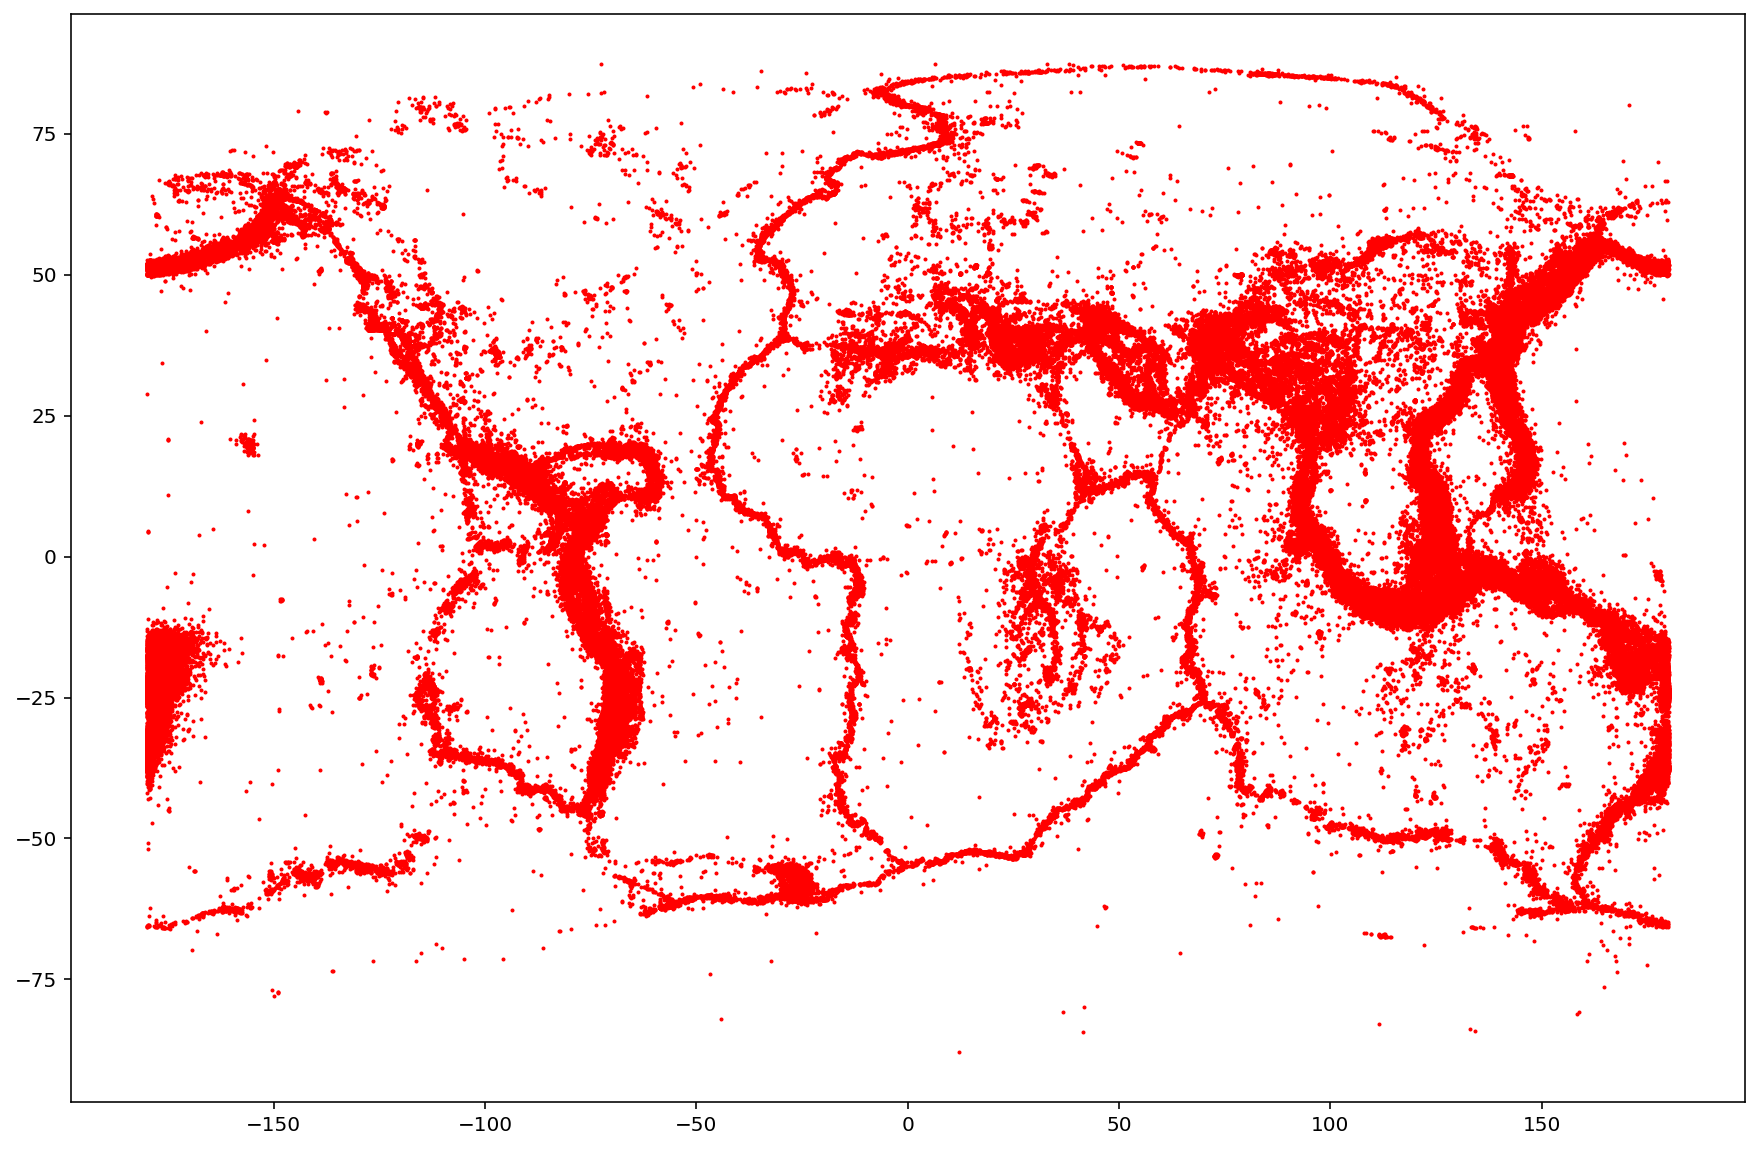

In [5]:
eq = np.loadtxt('earthquakes_4.txt')
print(eq.shape)
plt.plot(eq[:,1],eq[:,0],'or',mfc='w',ms=1)
plt.show()

#### (b) Fractions: <font color="red" size=5> (5 pts) </font>
#### Calculate the fraction, f4, of earthquakes with magnitudes from 4.0 up to less than 5.0. 
#### Calculate the fraction, f5, of earthquakes with magnitudes from 5.0 up to less than 6.0.
#### Calculate the fraction, f6, of earthquakes with magnitudes from 6.0 up to less than 7.0.
#### Calculate the fraction, f7, of earthquakes with magnitudes from 7.0 up to less than 8.0.
#### Calculate the fraction, f8, of earthquakes with magnitudes from 8.0 up to less than 9.0.
#### Print your results in percent (%) and label them clearly.

#### (c) Print the ratios f4/f5, f5/f6, f6/f7, f7/f8 and answer two questions:<font color="red" size=5> (4 pts) </font>
#### (i) What law describes the value of these ratios?
#### (ii) According to this law, what value should these rations be approximately equal to?


In [6]:
mag = eq[:,2]
n = mag.shape[0]
n4 = 0
n5 = 0
n6 = 0
n7 = 0
n8 = 0
for i in range(n):
    if (mag[i]>=4.0 and mag[i]<5.0): n4 += 1;
    if (mag[i]>=5.0 and mag[i]<6.0): n5 += 1;
    if (mag[i]>=6.0 and mag[i]<7.0): n6 += 1;
    if (mag[i]>=7.0 and mag[i]<8.0): n7 += 1;
    if (mag[i]>=8.0 and mag[i]<9.0): n8 += 1;
print(n4/n,n5/n,n6/n,n7/n,n8/n)
print(n4/n5,n5/n6,n6/n7,n7/n8)

0.8545765844985671 0.1356078524504408 0.008924989650092908 0.0008312018408392892 5.616228654319522e-05
6.301822269553899 15.194174757281553 10.737451737451737 14.8


#### (d) In the sprit of homework 10, write a Python function that computes the distance in kilometers (km) between two earthquakes from their latitude and longitude values. We ask you to write your own function and only use NumPy functions.<font color="red" size=5> (6 pts) </font>

In [7]:
def dist(lat1,lon1,lat2,lon2):
    #print(lat1,lon1,lat2,lon2)
    diffLat  = np.abs(lat1-lat2)
    diffLon  = np.abs(lon1-lon2)
    #return np.sqrt(diffLat**2 + diffLon**2)
    avLat = (lat1+lat2)/2.0
        
    R = 6371.0; # radius of the Earth in km
    dx = np.cos(avLat/180.0*np.pi)* np.pi*R/180*diffLat
    dy = 2.0*np.pi*R/360*diffLon
    dist = np.sqrt(dx**2+dy**2)
    return dist

#### (e) The eternal city of Rome is located at 41.9028° N and 12.4964° E. Plot its location with light blue circle of size 10 into global earthquake map as you have done in part (a). Then using the catalog provided, determine how far away in km from this location did the closest earthquake occur and what magnitude did it have?<font color="red" size=5> (8 pts) </font>

11838.262984956924 4.4
11188.893955068126 4.8
10556.279528209529 5.0
8107.3616716789475 4.6
6572.310493720855 4.4
6553.543438267857 4.5
4944.68741803257 4.2
642.0242627303277 4.5
526.3754580902131 4.6
185.51155732025435 4.7
152.58126274954586 4.3
108.96238835101157 4.3
100.05961001200113 4.1
98.6224646351455 4.0
90.28162396204833 4.6
77.9076805727934 4.3
63.616846836471 4.3
44.902065716333794 4.8
44.3282816695979 4.1
28.375374562270576 6.2


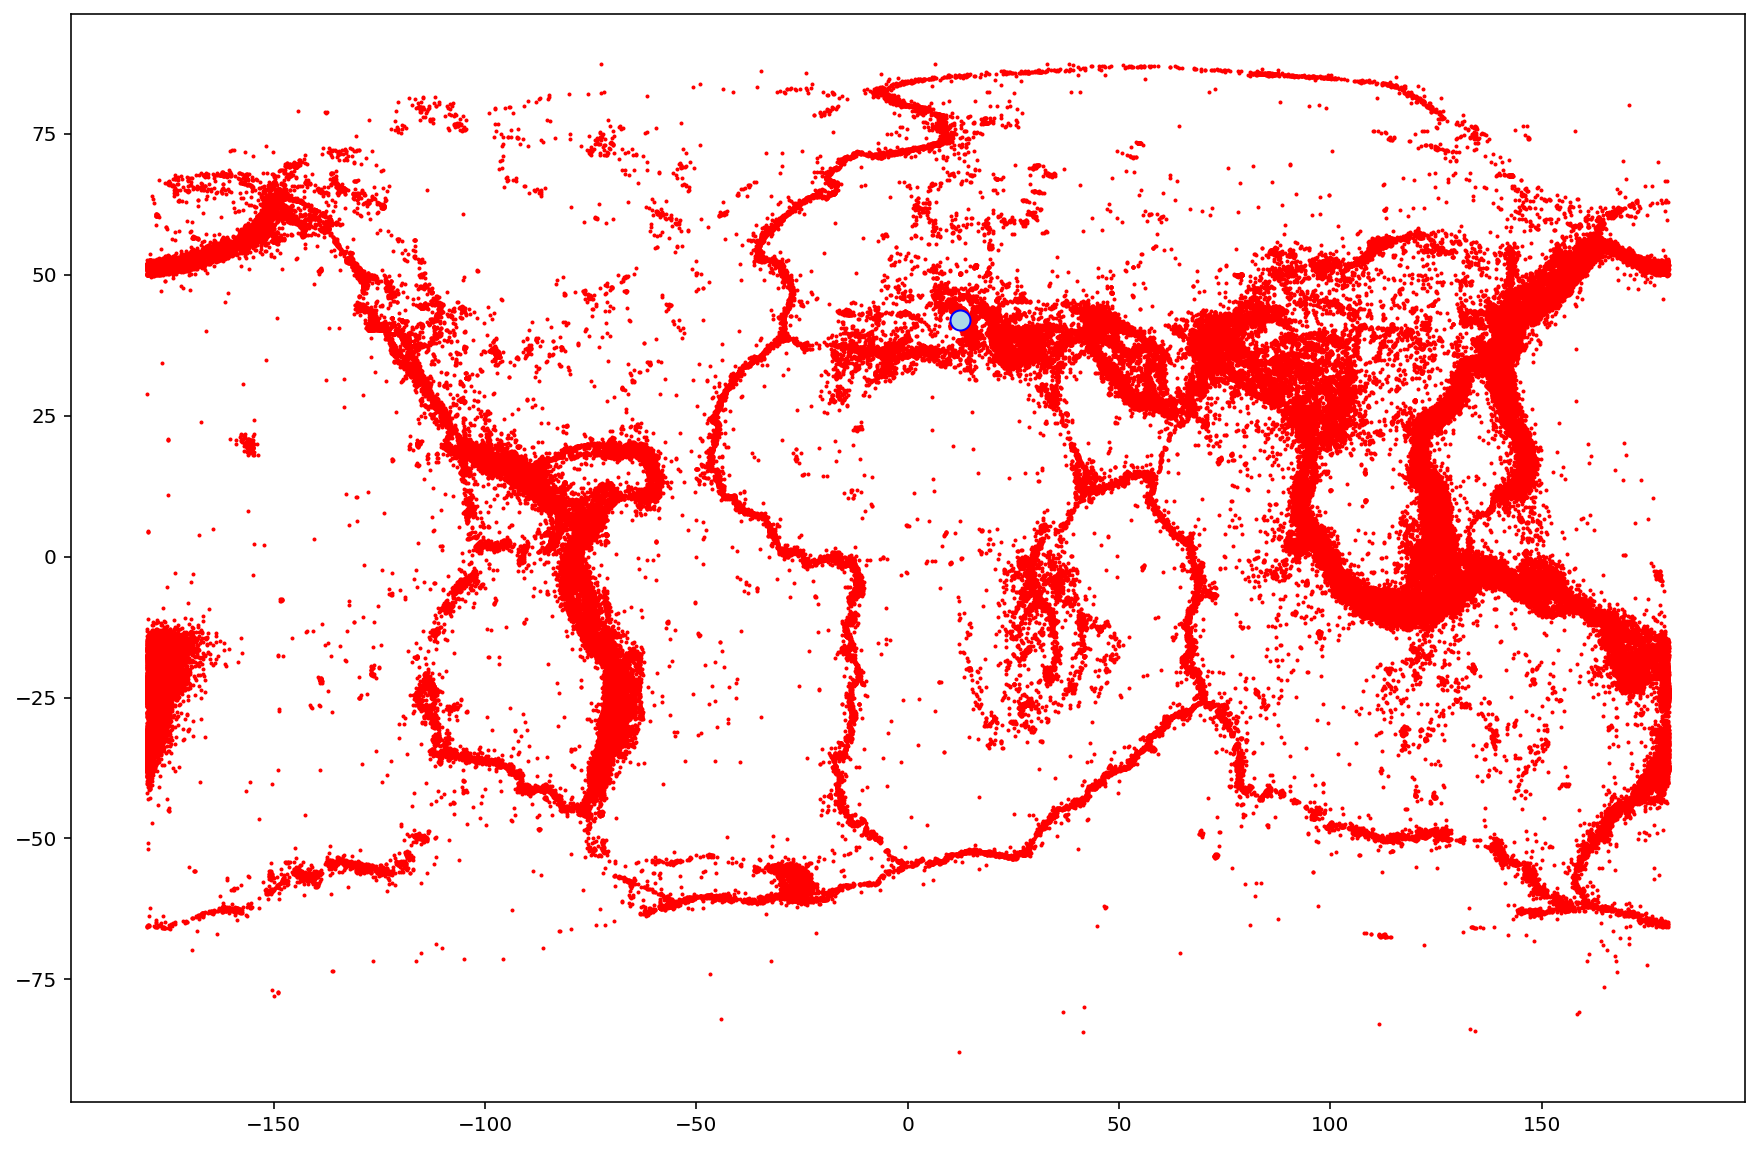

In [8]:
# 41.9028° N, 12.4964° E
latRome = 41.9028
lonRome = 12.4964
lat = eq[:,0]
lon = eq[:,1]
dMin = 0.0
for i in range(n):
    d = dist(latRome,lonRome,lat[i],lon[i])
    #print(d)
    if (i==0 or d<dMin):
       dMin=d;
       print(dMin,mag[i])

plt.plot(lon,lat,'or',mfc='w',ms=1)
plt.plot(lonRome,latRome,'ob',mfc='lightblue',ms=10)
plt.show()

#### (f) Santiago de Chile  is located at 33.4489° S, 70.6693° W. Again plot its location with light blue circle of size 10 into global earthquake map as you have done in part (a). Using the catalog provided, determine how many earthquakes occurred within 100 km of the city's center. Print that number and then plot these earthquakes in a second, separate plot. Again mark the city center with a ligh blue cirlce.<font color="red" size=5> (8 pts) </font>

886


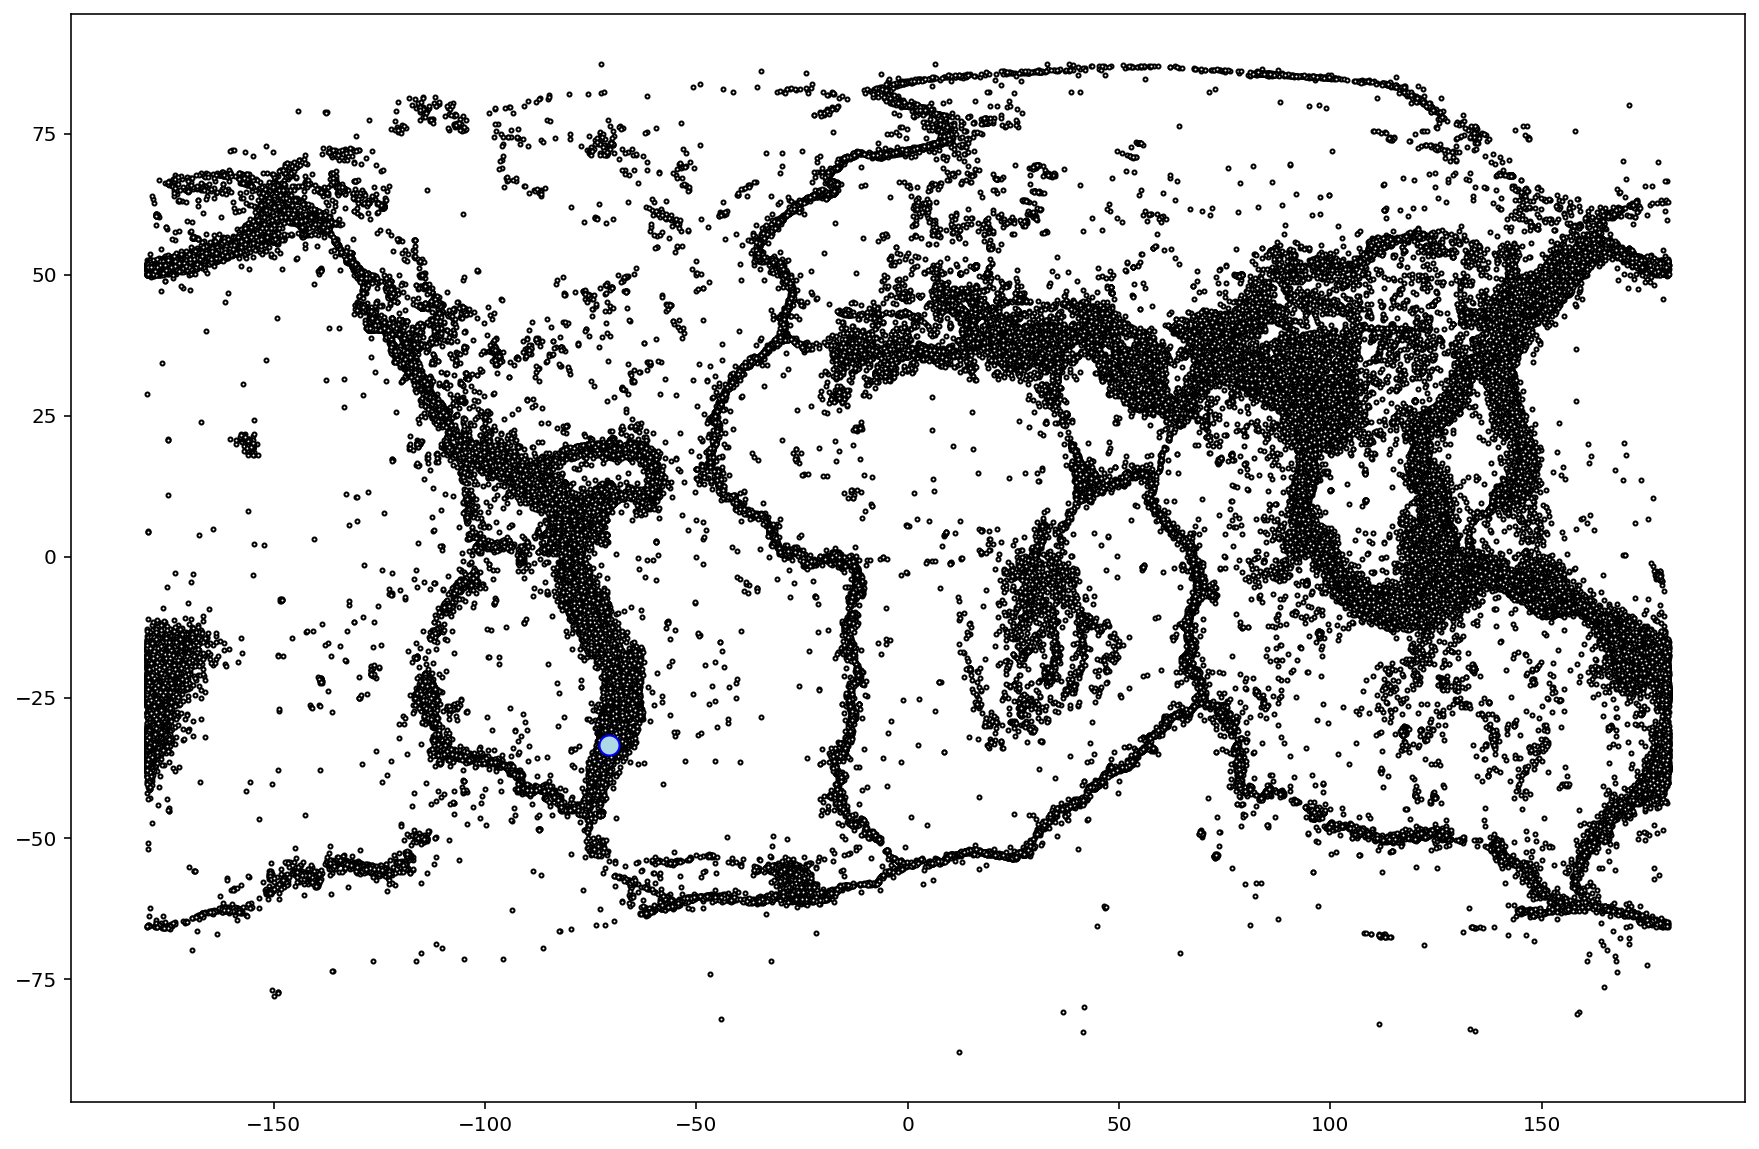

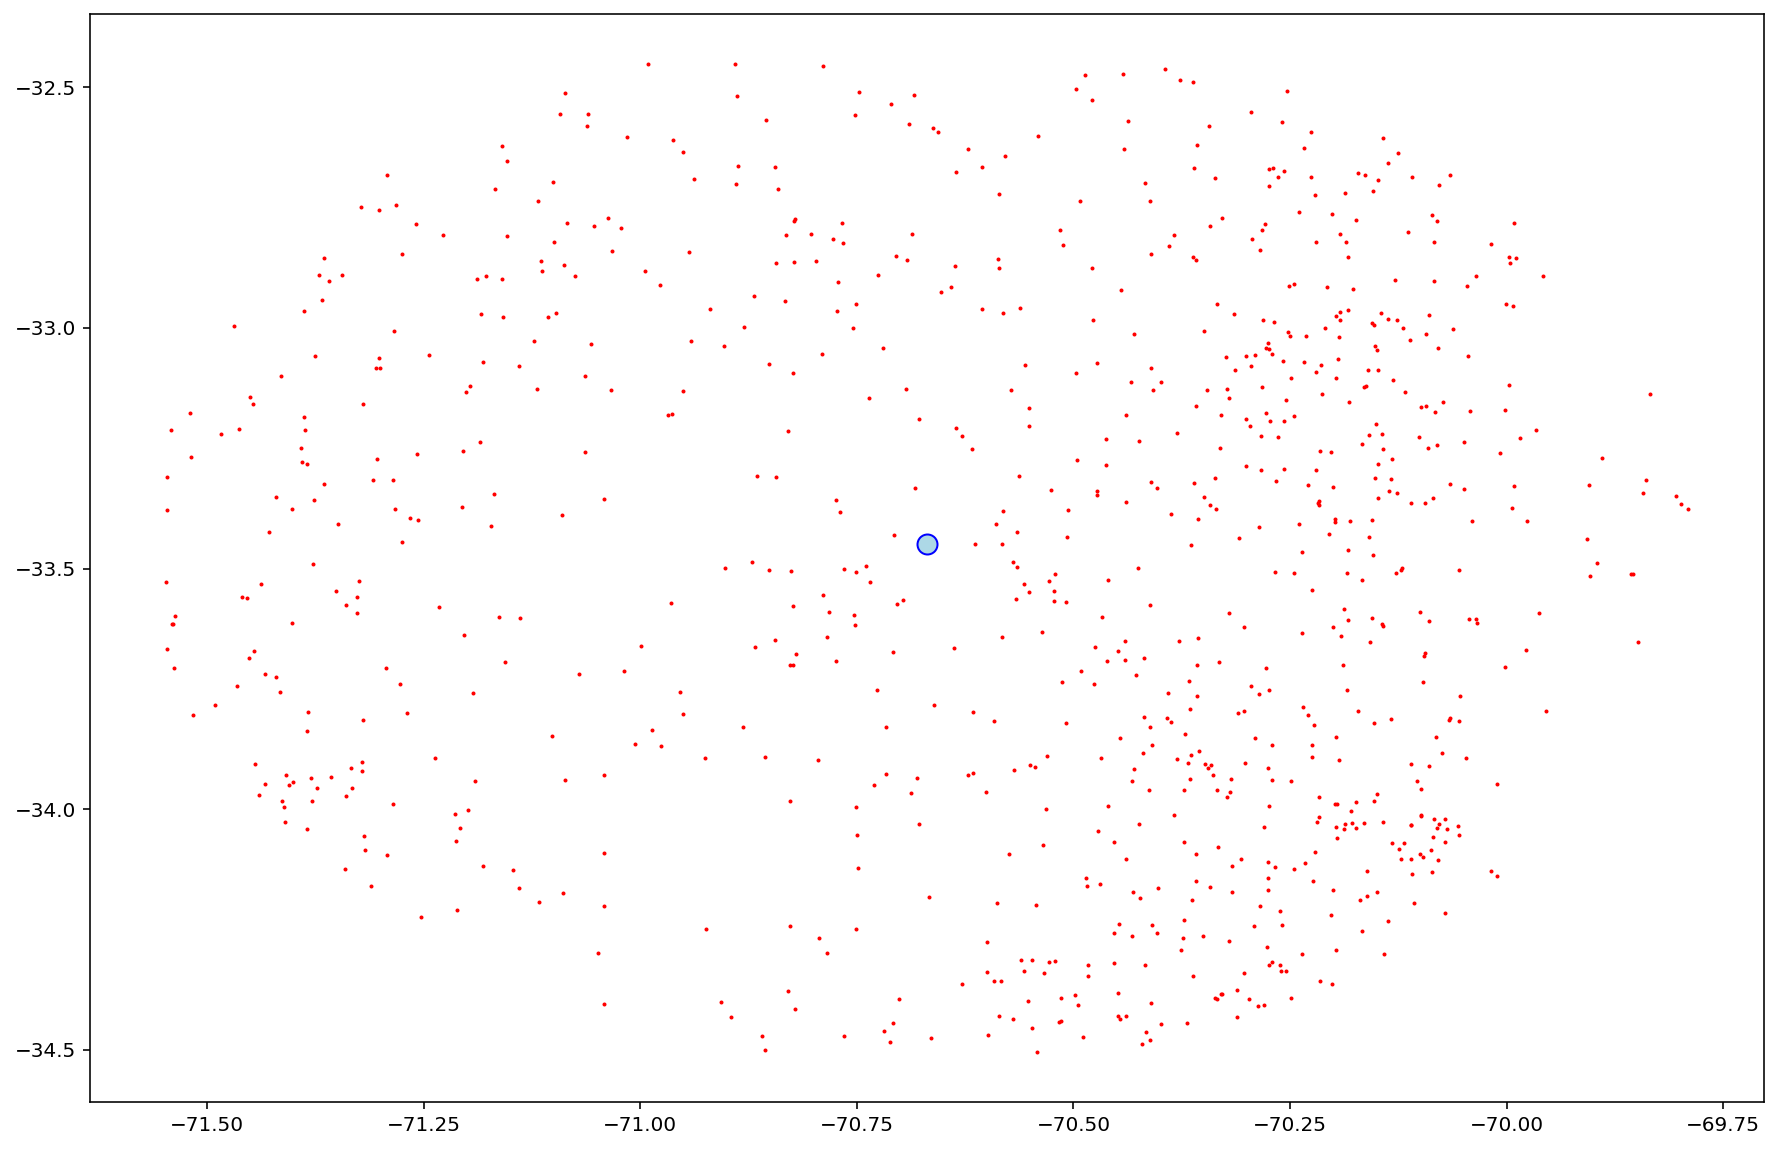

In [9]:
# 33.4489° S, 70.6693° W
latSan = -33.4489
lonSan = -70.6693
lat = eq[:,0]
lon = eq[:,1]
dMin = 0.0
nn = 0
index = []
for i in range(n):
    d = dist(latSan,lonSan,lat[i],lon[i])
    #print(d)
    if (d<=100.0):
       nn += 1
       index.append(i)
       #print(nn,mag[i])

print(nn)
plt.plot(lon,lat,'ok',mfc='w',ms=2)
plt.plot(lonSan,latSan,'ob',mfc='lightblue',ms=10)
plt.show()
plt.plot(lon[index],lat[index],'or',mfc='w',ms=1)
plt.plot(lonSan,latSan,'ob',mfc='lightblue',ms=10)
plt.show()

#### (g) The following commands bring up our world map from week 4. Using small red dots of size 1, plot all earthquakes from the catalog on top of this map. Please make sure both data sets line up correctly. <font color="red" size=5> (12 pts) </font>

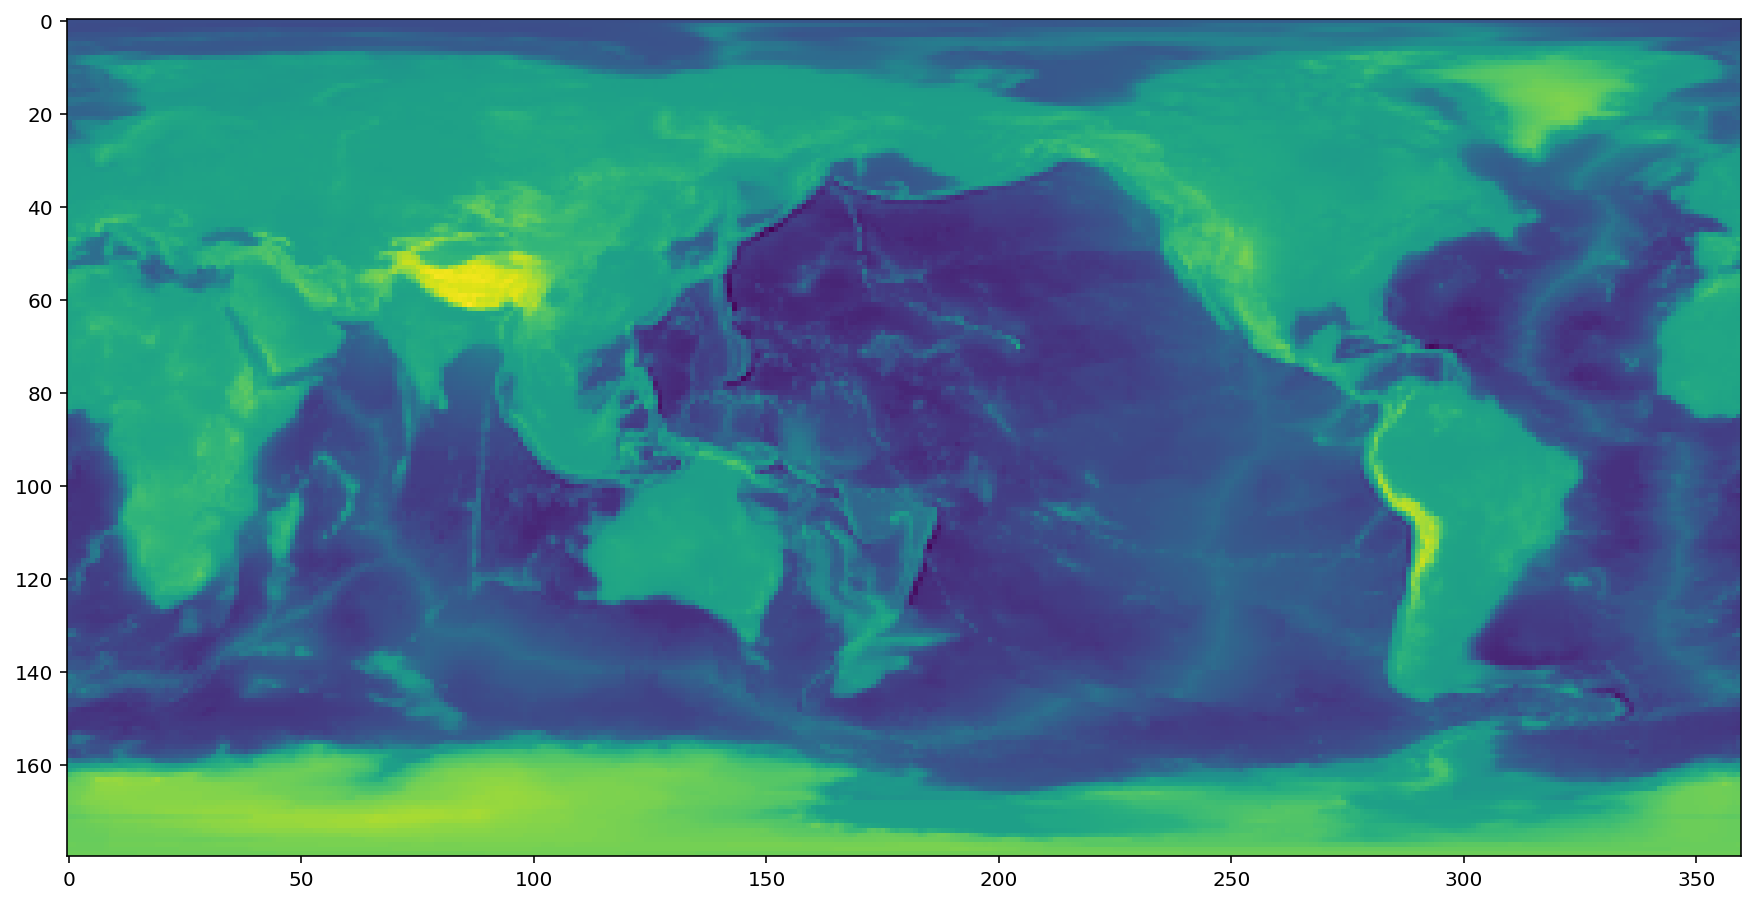

In [10]:
mpl.rcParams['figure.figsize'] = (15,10)
H = np.loadtxt('topography_180x360_grid.txt')
plt.imshow(H)

#### (h) Ater having lined up both data sets, compute and print the fraction of earthquakes that occurred in an ocean of a depth of 100 meters of more. Plot all those earthquakes with small white dots on top of a map that already shows our world map and all earthqukes in red color. <font color="red" size=5> (12 pts) </font>

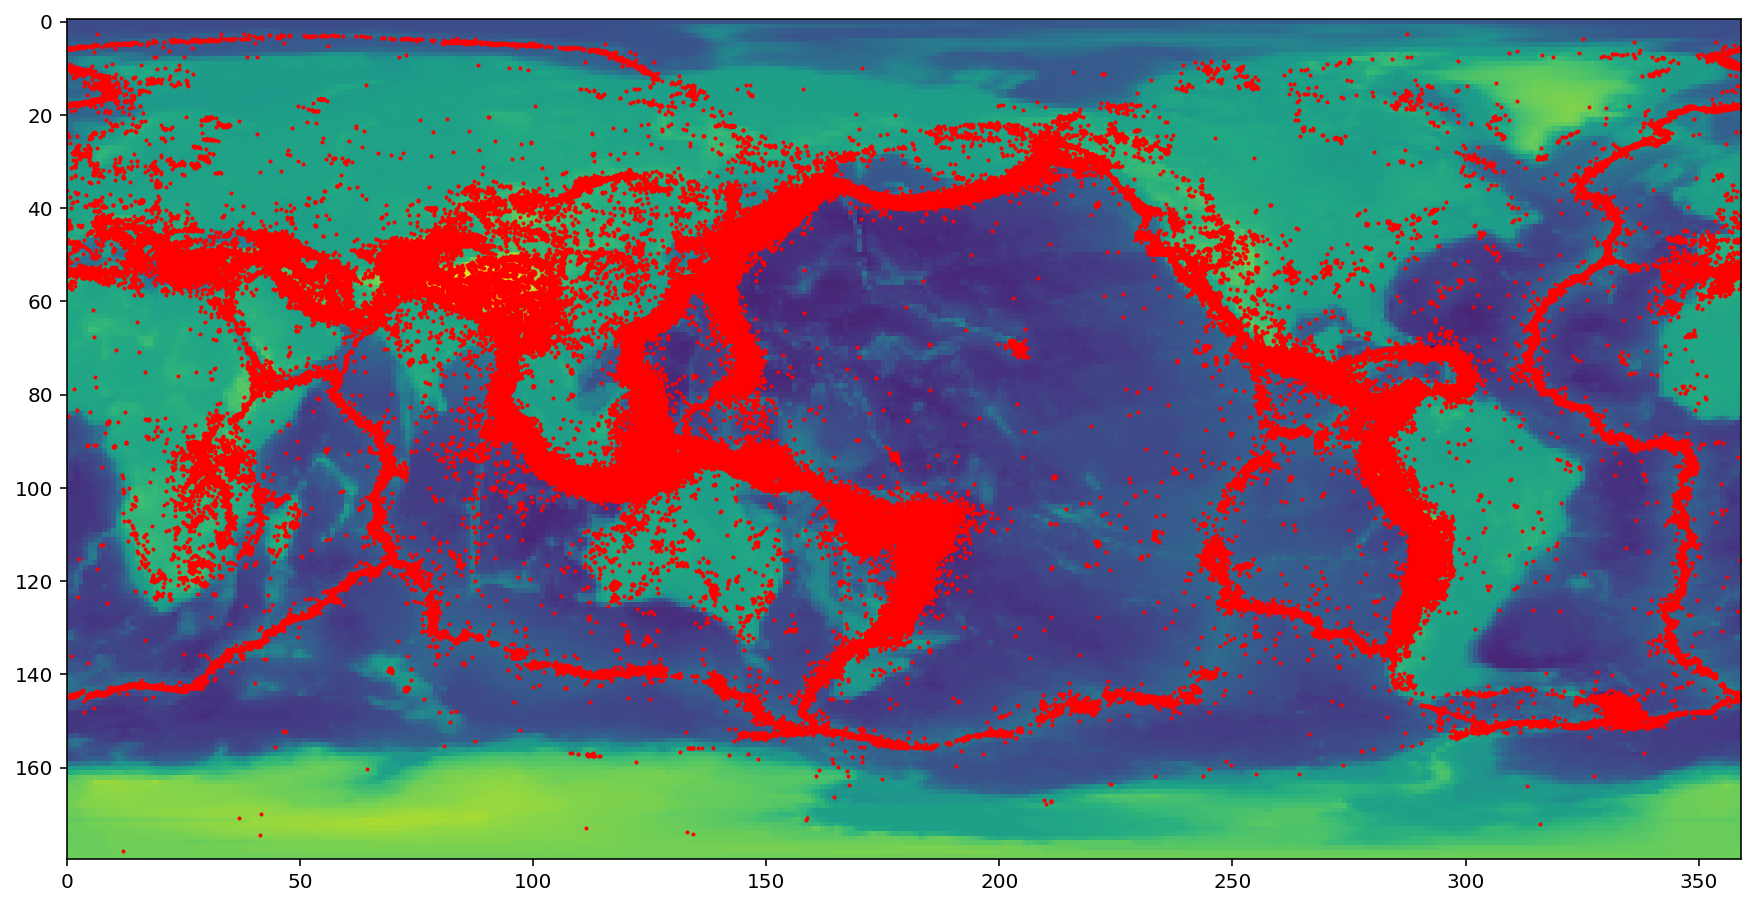

In [11]:
lat = (eq[:,1]+360)%360
lon = 90-eq[:,0]

mpl.rcParams['figure.figsize'] = (15,10)
H = np.loadtxt('topography_180x360_grid.txt')
plt.imshow(H)
#plt.plot((eq[:,1]+360)%360,90-eq[:,0],'or',mfc='w',ms=1)
plt.plot(lat,lon,'or',mfc='w',ms=1)
plt.xlim(0,359)
plt.show()

0.7278022574029916


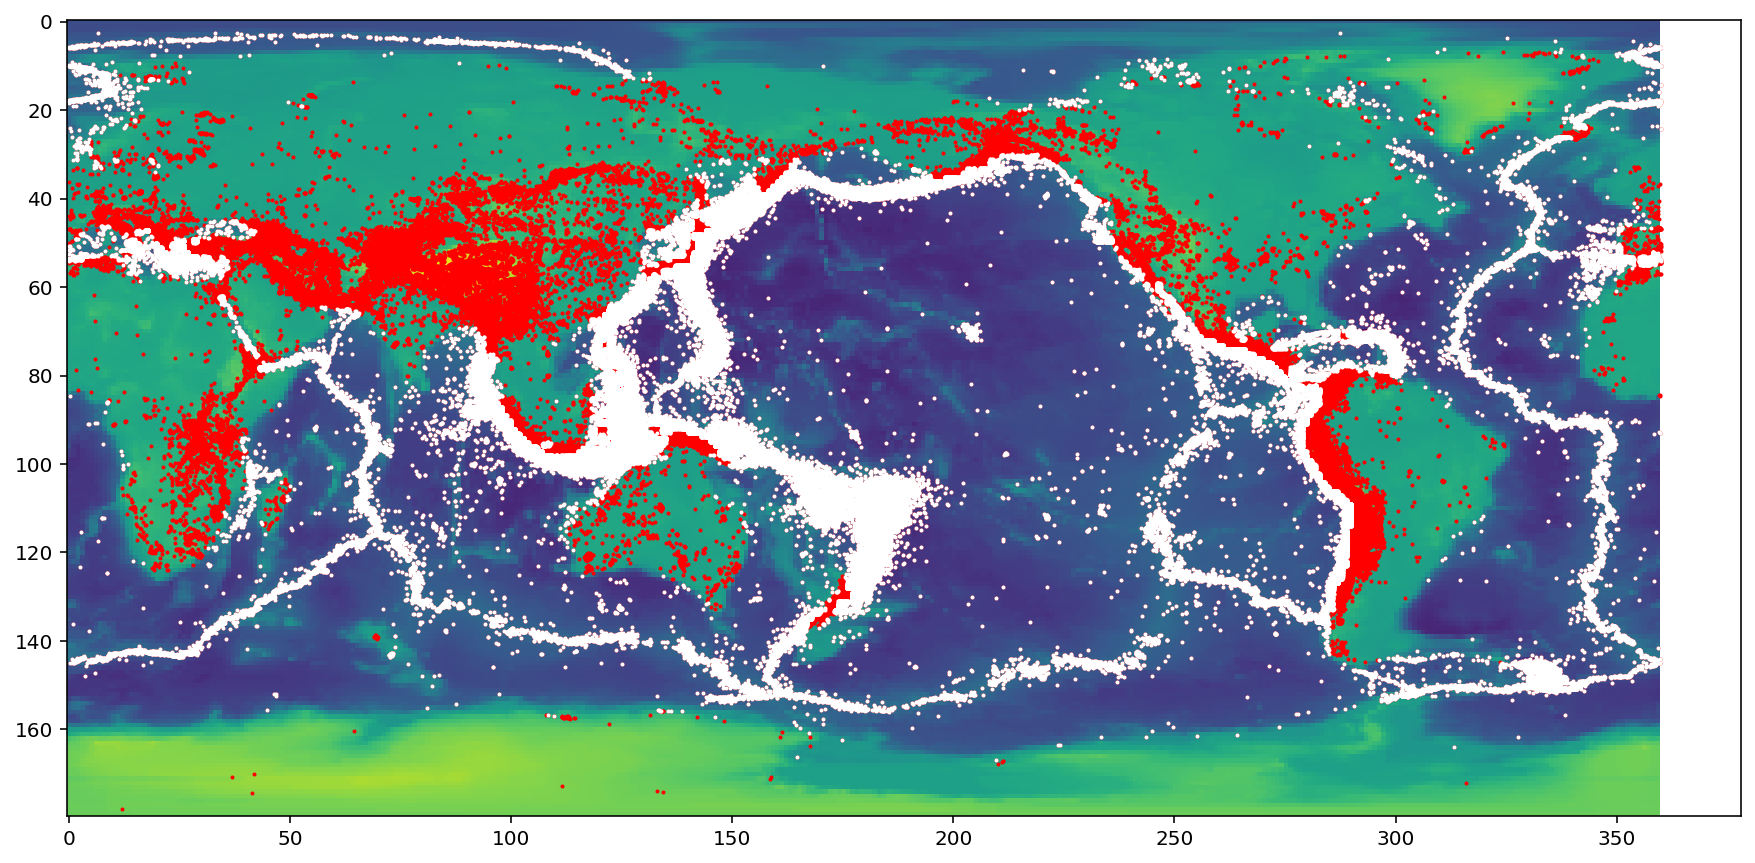

In [12]:
lat2 = np.floor(lat)
lon2 = np.floor(lon)
nn = 0
index = []
for i in range(n):
    if (H[int(lon2[i]),int(lat2[i])]<-100.0): 
        nn += 1
        index.append(i)
print(nn/n)

plt.imshow(H)
#plt.plot((eq[:,1]+360)%360,90-eq[:,0],'or',mfc='w',ms=1)
plt.plot(lat,lon,'or',mfc='w',ms=1)
plt.plot(lat[index],lon[index],'ow',mfc='w',ms=1)